# MULTICLASS CLASSIFICATION 



In [352]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score

In [353]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [354]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [355]:
#print the unique values in Y_train
print(np.unique(Y_train))
#print(len(X_train))
#print(len(Y_train))

[0 1 2 3 4 5 6 7 8 9]


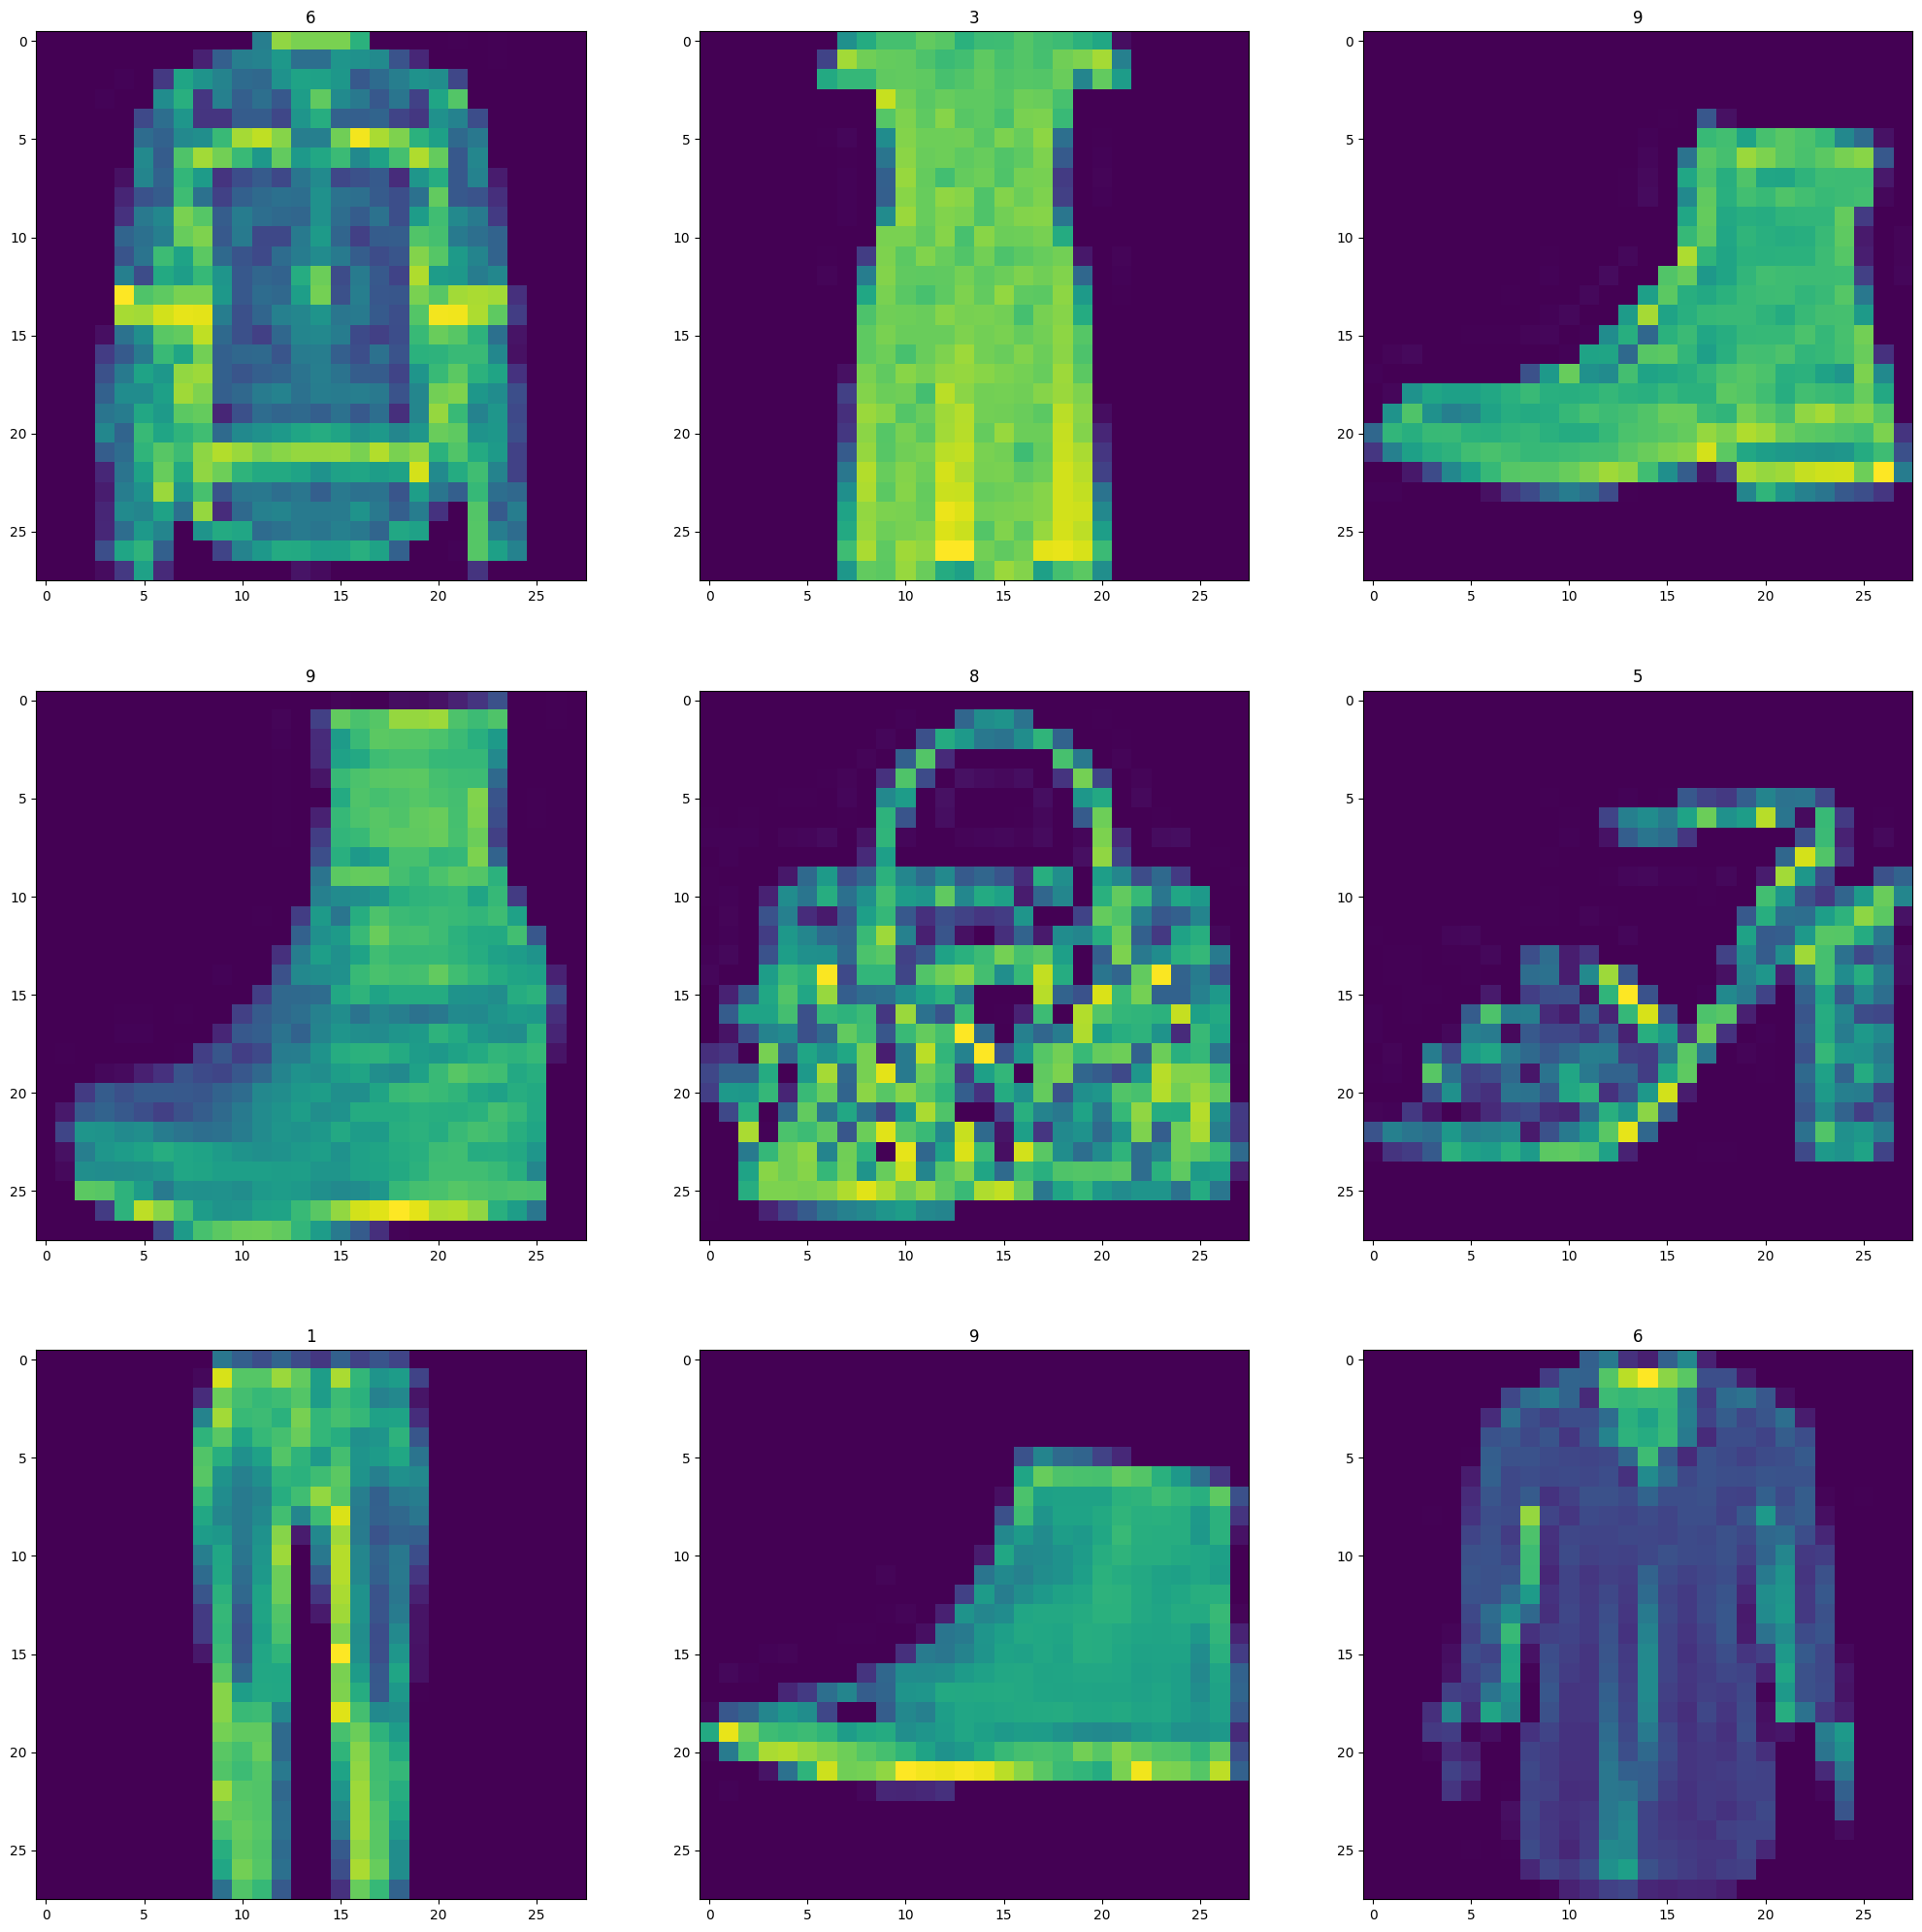

In [356]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25)) #customisation
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  img = X_train[index,0:28,0:28]
  plt.imshow(img)
  #edit2__add_label_here_
  plt.title(Y_train[index])


  

###These number denotes the respective object
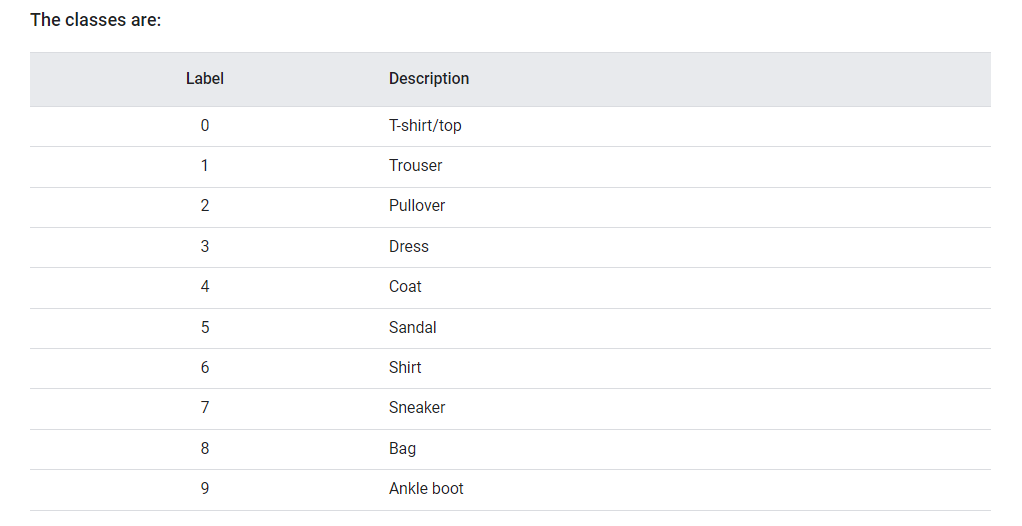

In [357]:
# Find the count of each type of class
#print(Y_train)
arr = np.zeros(10)
for x in Y_train :
  arr[x] += 1

print(arr)

[797. 801. 801. 794. 800. 805. 827. 791. 785. 799.]


In [358]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output

model.add(tf.keras.layers.Dense(128, activation = 'relu'))
#model.add(tf.keras.layers.Dense(120, activation = 'relu'))
model.add(tf.keras.layers.Dense(63, activation = 'relu'))
#model.add(tf.keras.layers.Dense(61, activation = 'relu'))
#model.add(tf.keras.layers.Dense(56, activation = 'relu'))
model.add(tf.keras.layers.Dense(42, activation = 'relu'))
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
'''
#model.add(tf.keras.layers.Dense(84, activation = 'relu'))

model.add(tf.keras.layers.Dense(36, activation = 'relu'))


model.add(tf.keras.layers.Dense(16, activation = 'relu'))'''


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [359]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 ),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

In [360]:
#Lets analyse the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_120 (Dense)           (None, 128)               100480    
                                                                 
 dense_121 (Dense)           (None, 128)               16512     
                                                                 
 dense_122 (Dense)           (None, 63)                8127      
                                                                 
 dense_123 (Dense)           (None, 42)                2688      
                                                                 
 dense_124 (Dense)           (None, 24)                1032      
                                                                 
 dense_125 (Dense)           (None, 16)              

###What is the number of trainable parameters in the model?

In [361]:
""" 
[objective] Write the answer here: 
129,791
"""

' \n[objective] Write the answer here: \n129,791\n'

In [362]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train, validation_split=0.2, epochs = 20)

Epoch 1/20
200/200 [==============================] - 2s 5ms/step - loss: 3.0705 - accuracy: 0.5216 - val_loss: 0.9584 - val_accuracy: 0.6587
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.9081 - accuracy: 0.6639 - val_loss: 0.8540 - val_accuracy: 0.6775
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.7795 - accuracy: 0.7138 - val_loss: 0.7959 - val_accuracy: 0.7163
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 0.7178 - accuracy: 0.7331 - val_loss: 0.7685 - val_accuracy: 0.7225
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.6724 - accuracy: 0.7487 - val_loss: 0.6882 - val_accuracy: 0.7450
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 0.6389 - accuracy: 0.7583 - val_loss: 0.6994 - val_accuracy: 0.7481
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 0.6077 - accuracy: 0.7777 - val_loss: 0.6947 - val_accuracy: 0.7444
Epoch 

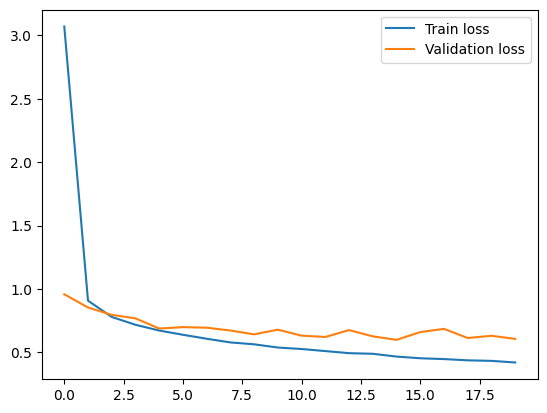

In [363]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [364]:
"""
[Under 100 words] Write your answer here:
observations --
1. sudden fall in training loss after initiall epochs
2. large negative slope of training loss than validation loss initially
3. initially training loss is greater than validation loss
4. this shows that the model is good fit as the validation loss becomes constant after decreasing to a value
5. train loss also becomes almost constant after a certain number of epochs which means there no possibility of further training hence training was not stopped prematured


"""

'\n[Under 100 words] Write your answer here:\nobservations --\n1. sudden fall in training loss after initiall epochs\n2. large negative slope of training loss than validation loss initially\n3. initially training loss is greater than validstion loss\n4. this shows that the model is good fit as the validation loss becomes constant after decreasing to a value\n5. train loss also becomes almost constant after a certain number of epochs which means there no possibility of further training hence training was not stopped prematured\n\n'

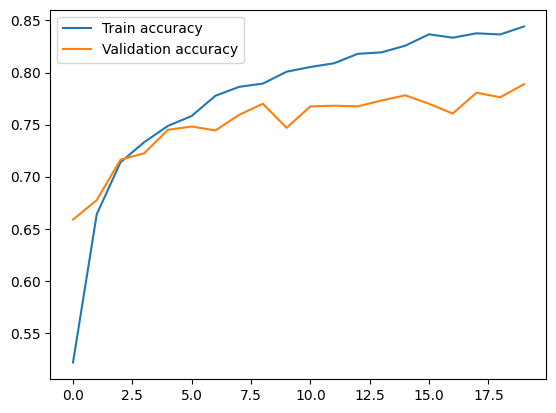

In [365]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [366]:
"""
[Under 100 words] Write your answer here:
The above plots obtained have very sharp kinks in them specially in validation accuracy.
large positive slope of learning rate in initial epochs shows fast learning in initial epochs
training accuracy is always increasing while validation accuracy is having some kinks in between, this might indicate the fact that the model is memorising the data , that is the model is overfitt
also there is large gap between validation accuracy and train accuracy
"""

'\n[Under 100 words] Write your answer here:\nThe above plots obtained have very sharp kinks in them specially in validation accuracy.\nlarge positive slope of learning rate in initial epochs shows fast learning in initial epochs\ntraining accuracy is always increasing while validation accuracy is having some kinks in between, this might indicate the fact that the model is memorising the data , that is the model is overfitt\nbut still as the validation accuracy is still increasing with training accuracy it can be considered as a good fit\n'

In [367]:
#Checking the prediction

Y_predicted = model.predict(X_test)
print(Y_predicted)

63/63 [==============================] - 0s 2ms/step
[[6.59943689e-05 1.21609728e-05 1.80535629e-01 ... 2.93263791e-09
  5.30327407e-06 4.39196457e-11]
 [3.30484045e-06 9.50246726e-09 1.88066608e-07 ... 1.46531835e-02
  5.54353901e-05 1.07637405e-01]
 [8.85024498e-09 1.90884431e-13 3.03456843e-10 ... 1.58413232e-03
  1.18145027e-09 3.16569555e-07]
 ...
 [7.64189190e-06 9.98454988e-01 8.65391994e-05 ... 3.60905208e-13
  2.42242093e-09 1.61317442e-14]
 [7.47573387e-04 3.82515339e-07 4.96882072e-04 ... 3.70834786e-12
  1.62825642e-09 4.29758318e-09]
 [5.59960899e-04 9.99119759e-01 5.43179813e-05 ... 4.16772433e-12
  7.04134891e-06 1.39504561e-10]]


In [368]:
# Calculate the R2score for the test data
Y_pred = np.argmax(Y_predicted, axis= 1)
r2_score(Y_test,Y_pred)

0.7214363308622521

In [369]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [370]:
# print the shape of kernel of other layers as well
for x in range (1,5) :
  print(model.layers[x].kernel.shape)

(784, 128)
(128, 128)
(128, 63)
(63, 42)


In [371]:
# Does that satisfied the matrix multiplication math discussed earlier
'''yes'''

'yes'